# Data Concatination and Preprocessing

All data is available for free at [optionsDX](https://www.optionsdx.com/product/spx-option-chain/). I have used eod data from 2010 upto and including q3 2023. The following sections of code assume a filestructure as follows:

```
.
|- data.ipynb
|- spx_data
|  |- spx_eod_2010
|  |  |- spx_eod_201001.txt
|  |  |- spx_eod_201002.txt
|  |  |- ....
|  |- spx_eod_2011
|  |  |- spx_eod_201101.txt
|  |  |- spx_eod_201102.txt
|  |  |- ....
|  |- ....
```

In [2]:
import pandas as pd
import os
import numpy as np

## Make a list of all data file paths

In [2]:
data_path = os.path.join( os.getcwd(), "spx_data" )

sub_dirs = [os.path.join(data_path, sub_dir) for sub_dir in os.listdir(data_path) ]
all_paths = []
for path in sub_dirs:
    for file in os.listdir(path):
        all_paths.append(os.path.join(path, file))

## Set up data types and converters where necessary

In [5]:
def float_converter(val):
    return float(val) if val.strip() != "" else np.nan

dtypes = {
    "[QUOTE_UNIXTIME]": int,
    " [QUOTE_READTIME]": str,
    " [QUOTE_DATE]": str,
    " [EXPIRE_DATE]": str,
    " [EXPIRE_UNIX]": int,
    " [C_SIZE]": str,
    " [P_SIZE]": str,
}
converters = {
    " [QUOTE_TIME_HOURS]": float_converter,
    " [UNDERLYING_LAST]": float_converter,
    " [DTE]": float_converter,
    " [C_DELTA]": float_converter,
    " [C_GAMMA]": float_converter,
    " [C_VEGA]": float_converter,
    " [C_THETA]": float_converter,
    " [C_RHO]": float_converter,
    " [C_IV]": float_converter,
    " [C_VOLUME]": float_converter,
    " [C_LAST]": float_converter,
    " [C_BID]": float_converter,
    " [C_ASK]": float_converter,
    " [STRIKE]": float_converter,
    " [P_BID]": float_converter,
    " [P_ASK]": float_converter,
    " [P_LAST]": float_converter,
    " [P_DELTA]": float_converter,
    " [P_GAMMA]": float_converter,
    " [P_VEGA]": float_converter,
    " [P_THETA]": float_converter,
    " [P_RHO]": float_converter,
    " [P_IV]": float_converter,
    " [P_VOLUME]": float_converter,
    " [STRIKE_DISTANCE]": float_converter,
    " [STRIKE_DISTANCE_PCT]": float_converter,
}

## Load all data into one big dataframe

In [6]:
dfs = []
for file in all_paths:
    dfs.append(pd.read_csv(file, dtype=dtypes, converters=converters, parse_dates=[' [QUOTE_READTIME]', ' [QUOTE_DATE]', ' [EXPIRE_DATE]']))

data = pd.concat(dfs)

## Reformat column names to remove whitespaces and '[' / ']'

The column names are badly formatted in the original dataset

In [7]:
data.columns = data.columns.str.strip()
data.columns = data.columns.map(lambda x: x.replace('[', ''))
data.columns = data.columns.map(lambda x: x.replace(']', ''))
data.columns

Index(['QUOTE_UNIXTIME', 'QUOTE_READTIME', 'QUOTE_DATE', 'QUOTE_TIME_HOURS',
       'UNDERLYING_LAST', 'EXPIRE_DATE', 'EXPIRE_UNIX', 'DTE', 'C_DELTA',
       'C_GAMMA', 'C_VEGA', 'C_THETA', 'C_RHO', 'C_IV', 'C_VOLUME', 'C_LAST',
       'C_SIZE', 'C_BID', 'C_ASK', 'STRIKE', 'P_BID', 'P_ASK', 'P_SIZE',
       'P_LAST', 'P_DELTA', 'P_GAMMA', 'P_VEGA', 'P_THETA', 'P_RHO', 'P_IV',
       'P_VOLUME', 'STRIKE_DISTANCE', 'STRIKE_DISTANCE_PCT'],
      dtype='object')

In [8]:
data.dtypes

QUOTE_UNIXTIME                  int64
QUOTE_READTIME         datetime64[ns]
QUOTE_DATE             datetime64[ns]
QUOTE_TIME_HOURS              float64
UNDERLYING_LAST               float64
EXPIRE_DATE            datetime64[ns]
EXPIRE_UNIX                     int64
DTE                           float64
C_DELTA                       float64
C_GAMMA                       float64
C_VEGA                        float64
C_THETA                       float64
C_RHO                         float64
C_IV                          float64
C_VOLUME                      float64
C_LAST                        float64
C_SIZE                         object
C_BID                         float64
C_ASK                         float64
STRIKE                        float64
P_BID                         float64
P_ASK                         float64
P_SIZE                         object
P_LAST                        float64
P_DELTA                       float64
P_GAMMA                       float64
P_VEGA      

In [10]:
data.head(10)

,QUOTE_UNIXTIME,QUOTE_READTIME,QUOTE_DATE,QUOTE_TIME_HOURS,UNDERLYING_LAST,EXPIRE_DATE,EXPIRE_UNIX,DTE,C_DELTA,C_GAMMA,...,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT
0,1567540800,2019-09-03 16:00:00,2019-09-03,16.0,2906.41,2019-09-03,1567540800,0.0,1.0,0.0,...,0.00,-0.00204,-0.00002,0.00773,-0.22537,0.00000,3.18655,NaN,1106.4,0.381
1,1567540800,2019-09-03 16:00:00,2019-09-03,16.0,2906.41,2019-09-03,1567540800,0.0,1.0,0.0,...,0.00,0.00000,0.00000,0.00184,-0.02485,0.00000,2.39020,NaN,1006.4,0.346
2,1567540800,2019-09-03 16:00:00,2019-09-03,16.0,2906.41,2019-09-03,1567540800,0.0,1.0,0.0,...,0.00,-0.00184,-0.00001,0.00917,-0.22528,0.00000,2.68891,NaN,956.4,0.329
3,1567540800,2019-09-03 16:00:00,2019-09-03,16.0,2906.41,2019-09-03,1567540800,0.0,1.0,0.0,...,0.00,-0.00073,0.00000,0.00195,-0.02521,-0.00011,2.11309,NaN,906.4,0.312
4,1567540800,2019-09-03 16:00:00,2019-09-03,16.0,2906.41,2019-09-03,1567540800,0.0,1.0,0.0,...,0.05,0.00000,0.00000,0.00132,-0.02509,-0.00050,1.98531,30.0,856.4,0.295
5,1567540800,2019-09-03 16:00:00,2019-09-03,16.0,2906.41,2019-09-03,1567540800,0.0,1.0,0.0,...,0.00,-0.00021,0.00000,0.00210,-0.02538,0.00000,1.85401,NaN,806.4,0.277
6,1567540800,2019-09-03 16:00:00,2019-09-03,16.0,2906.41,2019-09-03,1567540800,0.0,1.0,0.0,...,0.15,0.00000,0.00004,0.00222,-0.02479,0.00000,1.72782,19.0,756.4,0.260
7,1567540800,2019-09-03 16:00:00,2019-09-03,16.0,2906.41,2019-09-03,1567540800,0.0,1.0,0.0,...,0.20,0.00000,-0.00003,0.00210,-0.02481,0.00000,1.60377,22.0,706.4,0.243
8,1567540800,2019-09-03 16:00:00,2019-09-03,16.0,2906.41,2019-09-03,1567540800,0.0,1.0,0.0,...,0.15,-0.00077,-0.00002,0.00240,-0.02565,0.00000,1.48366,1.0,656.4,0.226
9,1567540800,2019-09-03 16:00:00,2019-09-03,16.0,2906.41,2019-09-03,1567540800,0.0,1.0,0.0,...,0.00,-0.00034,0.00005,0.00284,-0.02550,0.00000,1.36355,NaN,606.4,0.209


Looking way cleaner!

In [13]:
data.to_hdf('data.h5', key='cleaned')

In [10]:
cleaned_data = pd.read_hdf('data.h5', key='cleaned')

## Sort data based on the Quote date

The concatination also results in duplicate indicies. So we reset the index

In [14]:
sorted_data = cleaned_data
sorted_data = sorted_data.sort_values('QUOTE_DATE')
sorted_data = sorted_data.reset_index(drop=True)
sorted_data

,QUOTE_UNIXTIME,QUOTE_READTIME,QUOTE_DATE,QUOTE_TIME_HOURS,UNDERLYING_LAST,EXPIRE_DATE,EXPIRE_UNIX,DTE,C_DELTA,C_GAMMA,...,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT,TTM,Moneyness
0,1262638800,2010-01-04 16:00:00,2010-01-04,16.0,1132.99,2010-12-16,1292533200,346.00,1.00000,0.00000,...,0.00002,0.03864,-0.00285,-0.01269,0.54598,0.0,883.0,0.779,0.947945,0.220655
1,1262638800,2010-01-04 16:00:00,2010-01-04,16.0,1132.99,2010-06-30,1277928000,176.96,0.94934,0.00053,...,0.00059,1.20309,-0.11064,-0.50686,0.31290,0.0,283.0,0.250,0.484817,0.750227
2,1262638800,2010-01-04 16:00:00,2010-01-04,16.0,1132.99,2010-06-30,1277928000,176.96,0.90576,0.00086,...,0.00081,1.56172,-0.13597,-0.72552,0.29397,0.0,233.0,0.206,0.484817,0.794358
3,1262638800,2010-01-04 16:00:00,2010-01-04,16.0,1132.99,2010-06-30,1277928000,176.96,0.85074,0.00125,...,0.00112,1.96105,-0.16154,-1.01614,0.27441,0.0,183.0,0.162,0.484817,0.838489
4,1262638800,2010-01-04 16:00:00,2010-01-04,16.0,1132.99,2010-06-30,1277928000,176.96,0.78019,0.00165,...,0.00153,2.38528,-0.18548,-1.40734,0.25556,0.0,133.0,0.117,0.484817,0.882620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14507124,1696017600,2023-09-29 16:00:00,2023-09-29,16.0,4286.60,2023-10-20,1697832000,21.00,0.01813,0.00040,...,0.00000,0.00000,0.00000,0.00000,NaN,2.0,278.4,0.065,0.057534,1.064947
14507125,1696017600,2023-09-29 16:00:00,2023-09-29,16.0,4286.60,2023-10-20,1697832000,21.00,0.01593,0.00029,...,0.00000,0.00000,0.00000,0.00000,NaN,1.0,283.4,0.066,0.057534,1.066113
14507126,1696017600,2023-09-29 16:00:00,2023-09-29,16.0,4286.60,2023-10-20,1697832000,21.00,0.01393,0.00035,...,0.00000,0.00000,0.00000,0.00000,NaN,1.0,288.4,0.067,0.057534,1.067279
14507127,1696017600,2023-09-29 16:00:00,2023-09-29,16.0,4286.60,2023-10-20,1697832000,21.00,0.02574,0.00048,...,0.00000,0.00000,0.00000,0.00000,NaN,5.0,258.4,0.060,0.057534,1.060281


In [6]:
sorted_data.to_hdf('data.h5', key='sorted')

## Add aggregates

We need some aggregate data: 

- Time to Maturity
- Moneyness


In [12]:
def compute_ttm(row):
    return (row['EXPIRE_UNIX'] - row['QUOTE_UNIXTIME'])/(60*60*24*365)

def compute_moneyness(row):
    return row['STRIKE'] / row['UNDERLYING_LAST']

cleaned_data['TTM'] = cleaned_data.apply(compute_ttm, axis=1)
cleaned_data['Moneyness'] = cleaned_data.apply(compute_moneyness, axis=1)
cleaned_data['Moneyness']

0         0.619321
1         0.653727
2         0.670931
3         0.688134
4         0.705338
            ...   
147510    2.217116
147511    2.317894
147512    2.418672
147513    2.519450
147514    3.023340
Name: Moneyness, Length: 14507129, dtype: float64

## Save datasets

In [13]:
cleaned_data.to_hdf('data.h5', key='cleaned_with_aggs')

In [16]:
sorted_data.to_hdf('data.h5', key='sorted_with_aggs')

In [3]:
sorted_data = pd.read_hdf('data.h5', key='sorted_with_aggs')

In [37]:
cleaned_data = pd.read_hdf('data.h5', key='cleaned_with_aggs')

## Visualizations over TTM and Moneyness

<Axes: xlabel='Moneyness'>

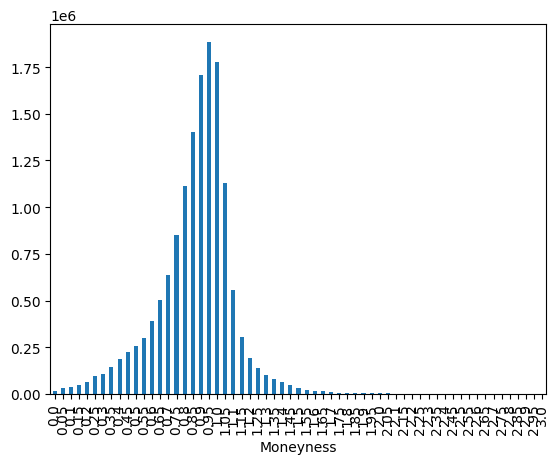

In [8]:
moneyness_binned = pd.cut(cleaned_data['Moneyness'], bins=np.arange(0, 3.1, 0.05)).value_counts()
moneyness_binned.sort_index().rename(lambda x: x.left).plot(kind='bar')

Text(0, 0.5, 'Number of samples')

<Figure size 640x480 with 0 Axes>

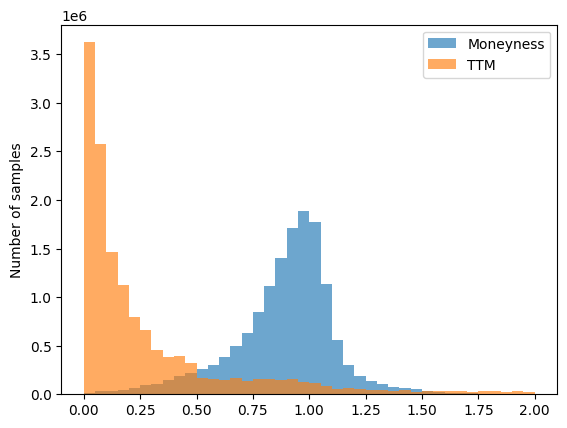

In [39]:
from matplotlib import pyplot as plt

plt.figure()
cleaned_data[['Moneyness', 'TTM']].plot.hist(alpha=0.65, bins=40, range=[0, 2])
plt.ylabel('Number of samples')

<Axes: xlabel='[TTM]'>

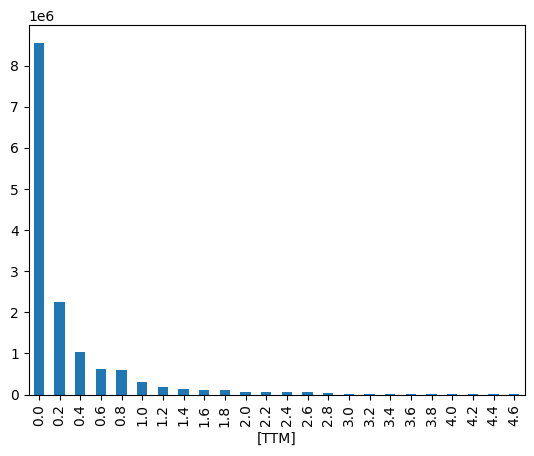

In [41]:
ttm_binned = pd.cut(data['[TTM]'], bins=np.arange(0, 5, 0.2)).value_counts()
ttm_binned.sort_index().rename(lambda x: x.left).plot(kind='bar')